# 信用情報の分析

Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。


Home Credit Default Risk | Kaggle


Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。

## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。
 
### 1 Home Creditはどのような企業？  

Home Creditは、電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測します。

### 2 このコンペティションでは何を予測する？  

各サンプル(顧客)の返済率(0.0-1.0)を予測する。目的変数は0 = 完済、1 = 未返済 の2種類。提出された予測結果はROC AUCに評価される。

### 3 それをすることで企業が得られるメリットは何？

返済可能なクライアントが拒否されないようにし、クライアントが成功するための元本、満期、および返済カレンダーを使用してローンが提供されるようになることで、ローンの最適化が図れる。

#### データセットの準備
分析対象のデータセットはコンペティションのDataページからapplication_train.csvをダウンロードして使用します。


また同ページ内にあるHomeCredit_columns_description.csvは、データセットに関する説明となっています。


Dataページ内の他のcsvファイルはこの課題では扱いません。


Notebooksについて
コンペティションのNotebooksページで公開されているものを活用してください。


《推奨参考Notebooks》


Home Credit Default Risk Extensive EDA | Kaggle


HomeCreditRisk: Extensive EDA + Baseline [0.772] | Kaggle


HomeCreditRisk : Extensive EDA + Baseline Model JP | Kaggle


この他タイトルにEDAと付いているものを参考にしてください。

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。


### ・.head()、.info()、describe()などを使う  
### ・欠損値の有無を見る  
### ・クラスの割合がわかるグラフを描く  

それぞれ結果に対する説明や考察も行ってください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

df = pd.read_csv("application_train.csv.zip")
np.set_printoptions(suppress=True) #表示数増やす
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

### .head()

In [2]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
df["TARGET"].unique()


array([1, 0], dtype=int64)

##### 目的変数はTARGET 値は０か１で、０が返済完了、１が未返済

### .info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


##### サンプル数(顧客数)は307,511個  列数122列、ID,TARGETを外し、特徴量120個(数値型104,文字型16)

### describe()

In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### 欠損値の有無を見る

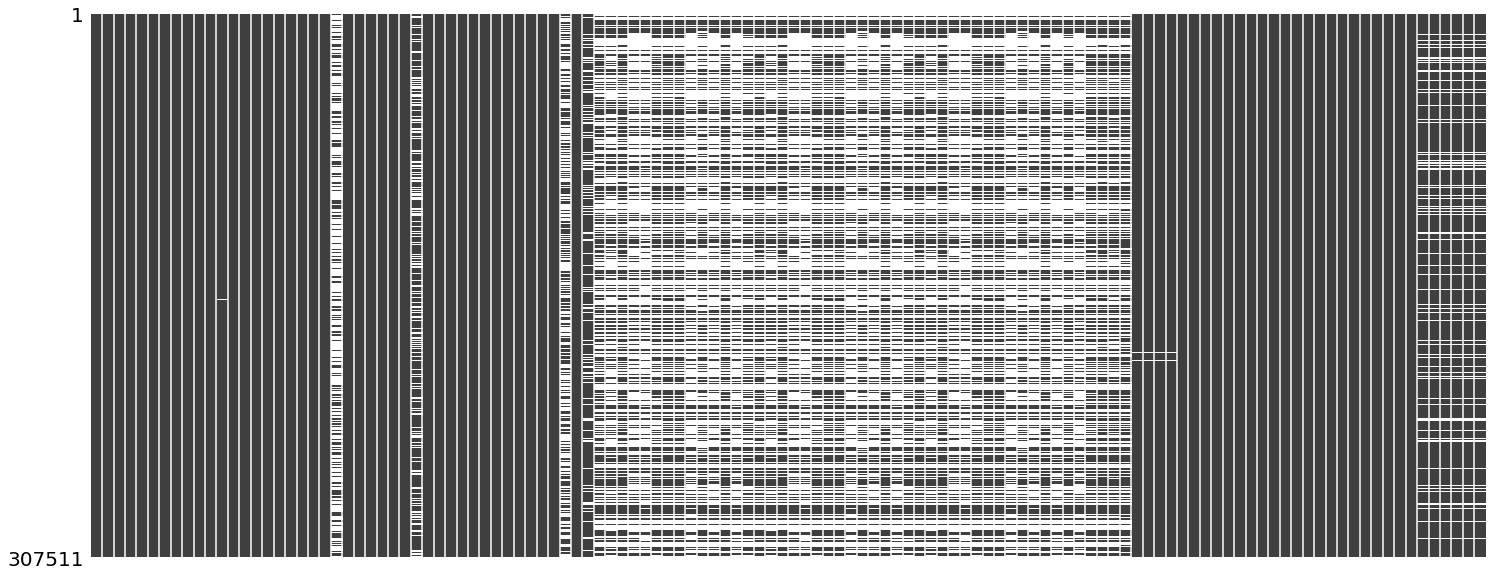

In [6]:
msno.matrix(df, sparkline=False)
plt.show()

In [7]:
#欠損率の表を作成

miss_val = df.isnull().sum()
miss_val_per = df.isnull().sum() / len(df) * 100
miss_val_table = pd.concat([miss_val, miss_val_per], axis=1)
miss_val_table = miss_val_table.rename(columns = {0 : 'Missing Values', 1 : 'Per of Total Values'}) 

#表を欠損率順に並べ替え、欠損値０のサンプルは除外
miss_val_table_sort = miss_val_table[miss_val_table.iloc[:,1] != 0].sort_values("Per of Total Values", ascending=False).round(1) #kakunin

print("欠損値を含む列数：{}".format(str(miss_val_table_sort.shape[0]))) #shape[0]はmiss_val...の行のこと、ndarray.shape (2,3)などを思い出すと楽
print(miss_val_table_sort)

欠損値を含む列数：67
                              Missing Values  Per of Total Values
COMMONAREA_MEDI                       214865                 69.9
COMMONAREA_AVG                        214865                 69.9
COMMONAREA_MODE                       214865                 69.9
NONLIVINGAPARTMENTS_MEDI              213514                 69.4
NONLIVINGAPARTMENTS_MODE              213514                 69.4
NONLIVINGAPARTMENTS_AVG               213514                 69.4
FONDKAPREMONT_MODE                    210295                 68.4
LIVINGAPARTMENTS_MODE                 210199                 68.4
LIVINGAPARTMENTS_MEDI                 210199                 68.4
LIVINGAPARTMENTS_AVG                  210199                 68.4
FLOORSMIN_MODE                        208642                 67.8
FLOORSMIN_MEDI                        208642                 67.8
FLOORSMIN_AVG                         208642                 67.8
YEARS_BUILD_MODE                      204488                 66.

欠損値を含む特徴量67/120 半数以上。
サンプル数の半数以上が欠損しているため、目的変数と相関する特徴量もふくまれている可能性が高いため、欠損データの除去には気をつける。

### クラスの割合がわかるグラフを描く

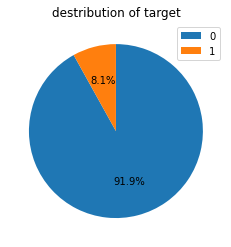

In [8]:

fig = plt.figure() #Figureインスタンスは、描画全体の領域を確保する。
ax = fig.add_subplot()#plt.figure()にグラフを描画するためにsubplotを追加する必要がある。Axesは、グラフの描画、軸のメモリ、ラベルの設定などを請け負う。

ax.pie(df["TARGET"].value_counts(), counterclock=False, startangle=90,autopct="%1.1f%%")
ax.set_title("destribution of target")

ax.legend(labels=[0,1])
plt.show()


## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

### 1,欠損値を含む特徴量が多いため、一律に除外すべきか特徴量を調査する  
### 2,目的変数との相関関係が強い特徴量はみられなかったため、数値データだけでなく文字データのラベリング処理が必要になる  
### 3,最も強い相関関係を示したラベル毎のデータ分布を確認し、各特徴量の目的変数との相関関係を調査する  
### 4,特徴量同士がどのような傾向にあるか確認する必要がある

## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 15個以上 作成してください。


探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

##### 1,欠損値を含む特徴量が多いため、一律に除外すべきか特徴量を調査する

In [9]:
#TARGETと相関関係が最も強い10種の特徴量
df.corr()["TARGET"].nlargest(10)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

最も強い正の関数はDAYS_BIRTH。
DAYS_BIRTHは負数のため負の相関の可能性あり。
目的変数は１が未返済を示すため、年齢が低いほど未返済も少ないことがわかる。

In [10]:
# TARGETと相関関係が最も弱い10種の特徴量
df.corr()["TARGET"].nsmallest(10)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64

最も強い負の関数はEXT_SOURCE1～3。
欠損率表から欠損値を含む。
目的変数との相関関係は不明なため除外せず。

In [22]:
#LabelEncodingを行う
from sklearn.preprocessing import LabelEncoder
#ラベルエンコーダオブジェクトを作成します
le = LabelEncoder()
le_count = 0

#列を反復処理します
for col in df:
    if df[col].dtype == "object":
        # 一意の要素が2つ以下の場合
        if len(list(df[col].unique())) <= 2:
            #ラベルとラベルIDの対応づけ
            le.fit(df[col])
            #ラベルとラベルIDの対応づけ後、変換する(数値へ)
            df[col] = le.transform(df[col])
            
            #ラベルでエンコードされた列の数を追跡します
            le_count += 1
            
print("%d columns were label encoding." % le_count)            

0 columns were label encoding.


In [12]:
#One-Hot Encodingを行う
#カテゴリ変数にone-hot encoding
#文字列でカテゴリー分けされた性別などのデータを、男を0, 女を1のように変換したり、多クラスの特徴量をone-hot表現に変換したりすることができる。機械学習の前処理として行うことが多い
df = pd.get_dummies(df)
print('Training Features shape:', df.shape)

Training Features shape: (307511, 246)


##### One-Hot Encodingによりダミーデータ列が増えたため、合計列は122から243に増加

In [13]:
#文字データをラベル化した正の相関
df.corr()["TARGET"].nlargest(10)

TARGET                                               1.000000
DAYS_BIRTH                                           0.078239
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
Name: TARGET, dtype: float64

In [14]:
#文字データをラベル化した負の相関
df.corr()["TARGET"].nsmallest(10)

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED                          -0.044932
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
Name: TARGET, dtype: float64

##### 文字データの中ではCODE_GENDERが目的変数と相関が強い、男性が返済率が低く、女性は高め

In [15]:
#高い相関の分布確認するため確率密度をラベル毎に出力
df_select = df.loc[:,["TARGET",
                    "DAYS_BIRTH",
                    "CODE_GENDER_M",
                    "CODE_GENDER_F",
                    "EXT_SOURCE_1",
                    "EXT_SOURCE_2",
                    "EXT_SOURCE_3"]]

#DAYS_BIRTHを日数から年後に変換
df_select["DAYS_BIRTH"] = df_select["DAYS_BIRTH"] / -365
df_select.describe()

,TARGET,DAYS_BIRTH,CODE_GENDER_M,CODE_GENDER_F,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000
mean,0.080729,43.936973,0.341643,0.658344,0.502130,5.143927e-01,0.510853
std,0.272419,11.956133,0.474261,0.474266,0.211062,1.910602e-01,0.194844
min,0.000000,20.517808,0.000000,0.000000,0.014568,8.173617e-08,0.000527
25%,0.000000,34.008219,0.000000,0.000000,0.334007,3.924574e-01,0.370650
50%,0.000000,43.150685,0.000000,1.000000,0.505998,5.659614e-01,0.535276
75%,0.000000,53.923288,1.000000,1.000000,0.675053,6.636171e-01,0.669057
max,1.000000,69.120548,1.000000,1.000000,0.962693,8.549997e-01,0.896010


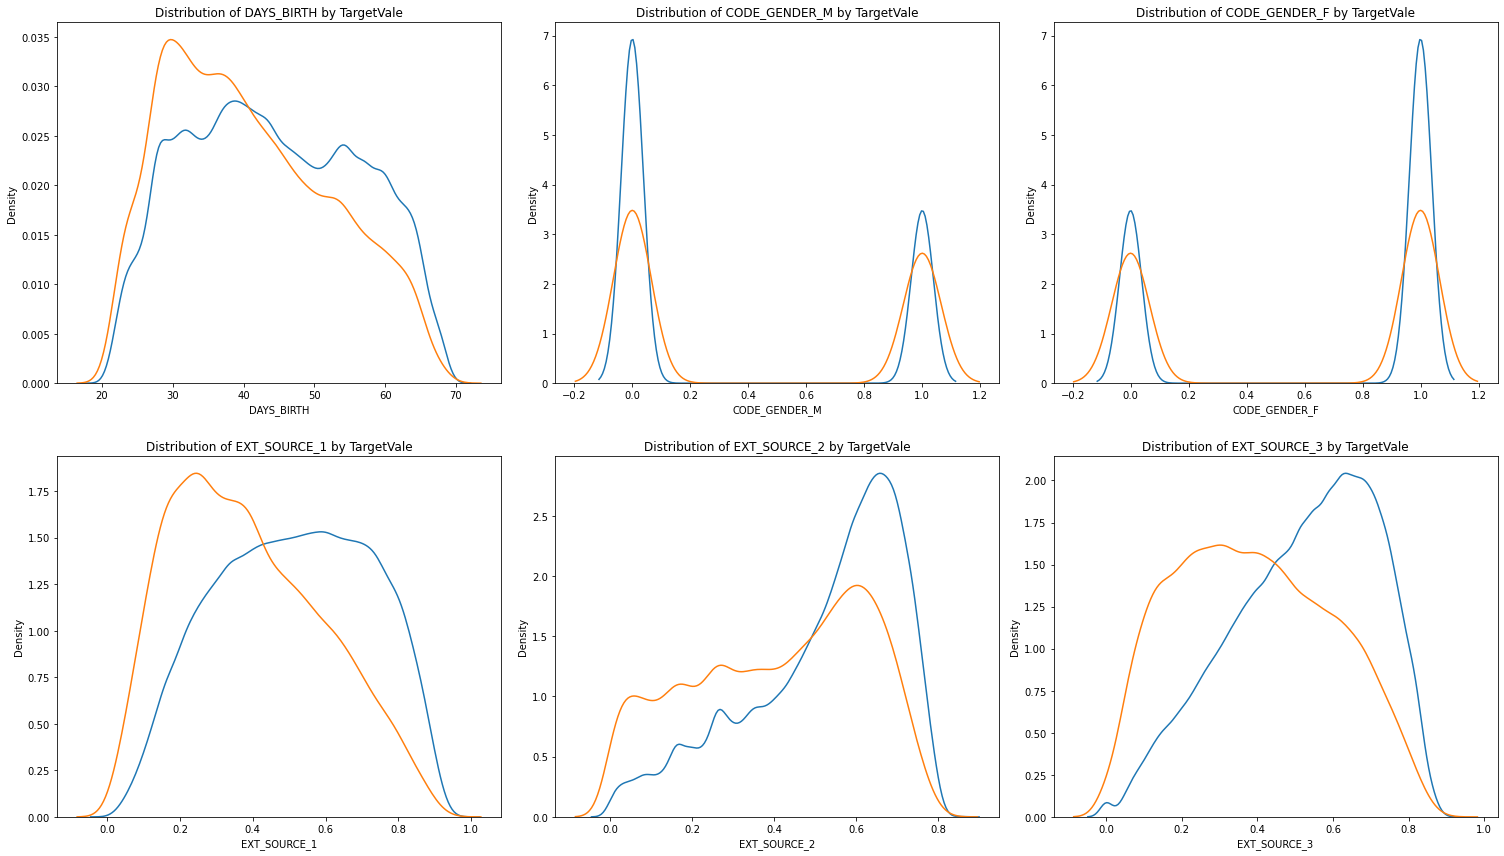

In [16]:
# 特徴量のKDE図を出力
plt.figure(figsize = (21, 12))

for i, source in enumerate(["DAYS_BIRTH", "CODE_GENDER_M","CODE_GENDER_F",
                    "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(df_select.loc[df_select["TARGET"] == 0, source],label="target == 0")
    sns.kdeplot(df_select.loc[df_select["TARGET"] == 1, source],label="target == 1")
    
    plt.title("Distribution of {} by TargetVale".format(source))
    plt.xlabel("{}".format(source)); plt.ylabel("Density");
    
plt.tight_layout(h_pad=2.5)

データの確認ができた。  
##### 年齢が高い顧客ほど、未返済率が下がる。完済率は年齢に相関なし。  
##### 未返済率に性別の差は無いが、女性の方が完済率は高い。  
##### EXT_SOURCE_1とEXT_SOURCE_3は共に数値が高いほど完済率は高い傾向にある。特にEXT_SOURCE_3では顕著。  

・未返済ラベルの年齢分布をヒストグラムで確認

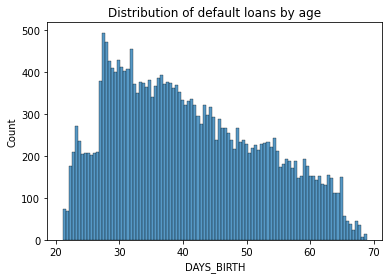

In [17]:
#未返済ラベルの年齢分布
fig = plt.figure()

plt.title("Distribution of default loans by age")
sns.histplot(df_select.loc[df_select["TARGET"] == 1, "DAYS_BIRTH"], bins= 100, kde=False)

plt.show()

##### KDE図でも確認できた通り未返済顧客は若年層に集中し、年齢につれて低下傾向

・性別による返済率を男女比別に円グラフで確認

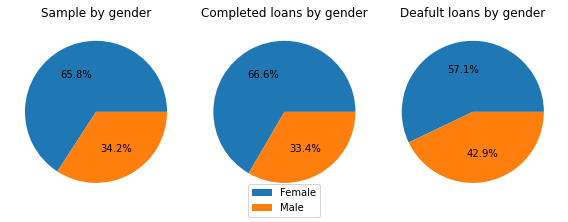

In [18]:
#ラベルごとの性別分布を表す円グラフ

fig, axs = plt.subplots(1, 3, figsize=(8,3))

axs[0].pie(df_select["CODE_GENDER_M"].value_counts(),autopct="%1.1f%%")
axs[1].pie(df_select.loc[df_select["TARGET"] == 0,"CODE_GENDER_M"].value_counts(),autopct="%1.1f%%")
axs[2].pie(df_select.loc[df_select["TARGET"] == 1,"CODE_GENDER_M"].value_counts(),autopct="%1.1f%%")

axs[0].set_title("Sample by gender")
axs[1].set_title("Completed loans by gender")
axs[2].set_title("Deafult loans by gender")

fig.legend(labels=["Female","Male"], loc="lower center")

plt.tight_layout()
plt.show()

##### 完済ラベルの2/3が女性であるとわかる。サンプル全体の数も女性が2/3のため結論づけはできない

・特徴量同士の相関関係を確認

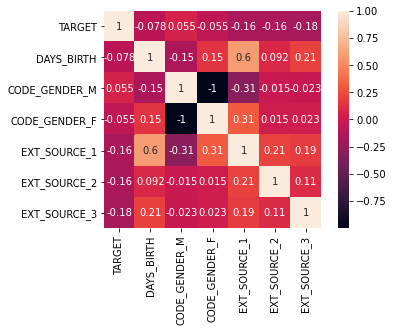

In [19]:
#抽出した特徴量の相関関数を出力
df_select_corr = df_select.corr()

#ヒートマップを出力
sns.heatmap(df_select_corr, annot=True, square="equal")
plt.show()

##### DAYS_BIRTHとEXT_SOURCE_1の相関関係が0.6と最も高い相関性を示している。
（CODE_GANDER_MとCODE_GANDER_Fの相関関係は-1ですが、One-Hot Encodingの影響である)



・sklearnのSimpleImputerクラスを使用してEXT_SOURCEの欠損値の代替を行いデータ全体へ影響を調べる。今回はデータの中央値を代替値として扱う。

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

df_impute = df_select.loc[:,["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].copy()

df_impute = imputer.fit_transform(df_impute)

columns = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]

df_impute = pd.DataFrame(df_impute, columns=columns)
df_impute = pd.concat([df_select["TARGET"], df_impute], axis=1)

for i, source in enumerate(columns):
    print("{}の欠損値数：{}".format(source, df_impute[source].isnull().sum()))

EXT_SOURCE_1の欠損値数：0
EXT_SOURCE_2の欠損値数：0
EXT_SOURCE_3の欠損値数：0


##### 欠損値は代替できた

EXT_SOURCE_1に代入した値：0.5059979305057544
EXT_SOURCE_2に代入した値：0.5659614260608526
EXT_SOURCE_3に代入した値：0.5352762504724826


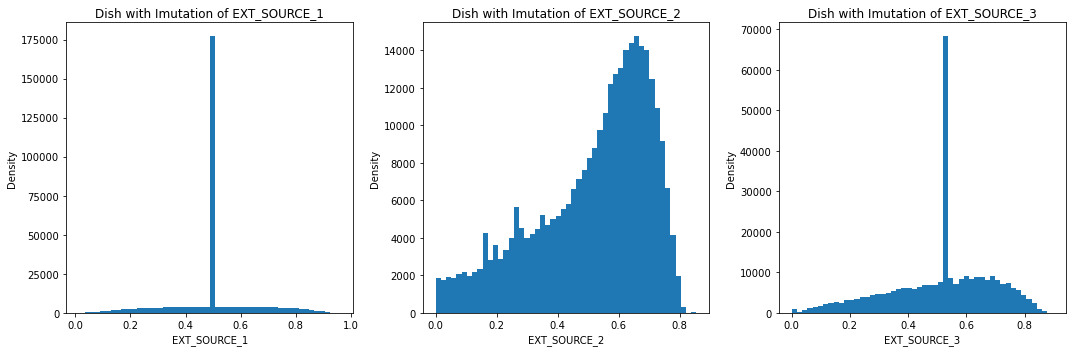

In [21]:
#欠損値を代替したデータの分布を確認
plt.figure(figsize = (15,5))

for i, source in enumerate(["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]):
    
    plt.subplot(1, 3, i + 1)
    plt.hist(df_impute[source], bins=50)
    
    plt.title("Dish with Imutation of {}".format(source))
    plt.xlabel("{}".format(source))
    plt.ylabel("Density")
    print("{}に代入した値：{}".format(source, df_select[source].median()))

plt.tight_layout(h_pad=2.5)    

##### 中央値を欠損値に代入した結果、EXT_SOURCE_1とEXT_SOURCE_3の分布が大きく変わってしまった。
##### これらの特徴量は決算値を多く含んでいたため（それぞれ56.4％と19.8％）、このように分布が崩れてしまったと考えられる。
##### EXT_SOURCE_2の欠損率はわずか0.2％のため分布は崩れなかった。

#### 結論は欠損値の数値代替えはデータ分布の変化を起こす危険性があるため、欠損率の低いデータセットに行うべきだと考えらる。

## 【問題5】（アドバンス課題）Notebooksへの投稿
必須ではありませんが、コンペティションのNotebooksページに今回作成したEDAのノートブックを投稿することを推奨しています。